In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/Books_Data_Clean.csv')

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [5]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [6]:
df = df.loc[df['Publishing Year'] > 1900]

In [7]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [8]:
df.isnull().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [9]:
df = df.dropna(subset = 'Book Name')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


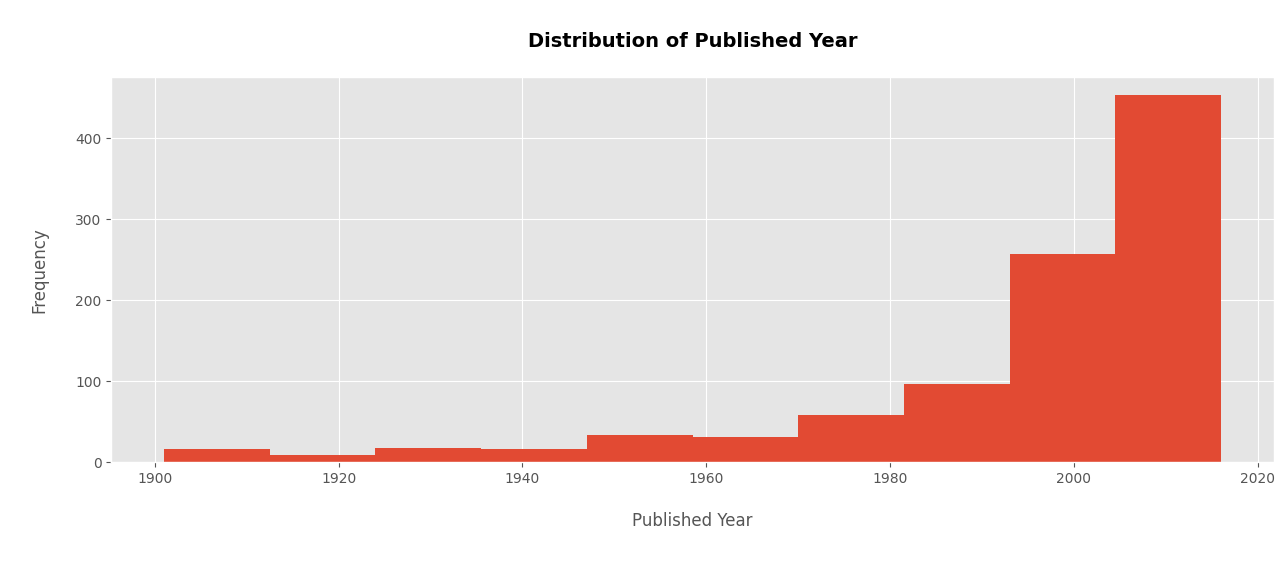

In [12]:
plt.figure(figsize = (15 , 5))
plt.hist(df['Publishing Year'])
plt.title('\nDistribution of Published Year\n' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('\nPublished Year\n' , fontsize = 12 )
plt.ylabel('\nFrequency\n' , fontsize = 12)
plt.show()

In [13]:
df['genre'].value_counts()

,count
genre,
genre fiction,759
nonfiction,160
fiction,54
children,15


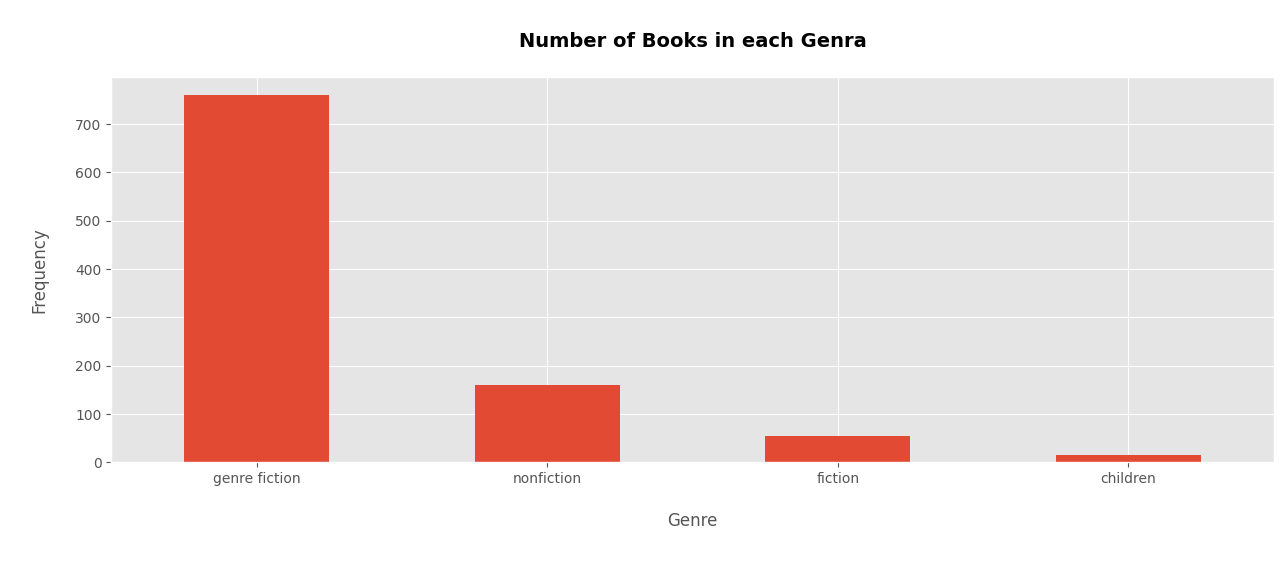

In [14]:
plt.figure(figsize = (15 , 5))
df['genre'].value_counts().plot(kind = 'bar')
plt.title('\nNumber of Books in each Genra\n' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('\nGenre\n' , fontsize = 12 )
plt.ylabel('\nFrequency\n' , fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [15]:
df.groupby('Author')['Book_average_rating'].mean().reset_index().sort_values( by = 'Book_average_rating' , ascending = False)

,Author,Book_average_rating
72,Bill Watterson,4.650000
73,"Bill Watterson, G.B. Trudeau",4.610000
258,J.R.R. Tolkien,4.590000
213,George R.R. Martin,4.560000
568,Sarah J. Maas,4.526000
...,...,...
108,Chetan Bhagat,3.273333
48,Audrey Niffenegger,3.230000
234,"Herman Koch, Sam Garrett",3.220000
492,P.D. James,3.210000


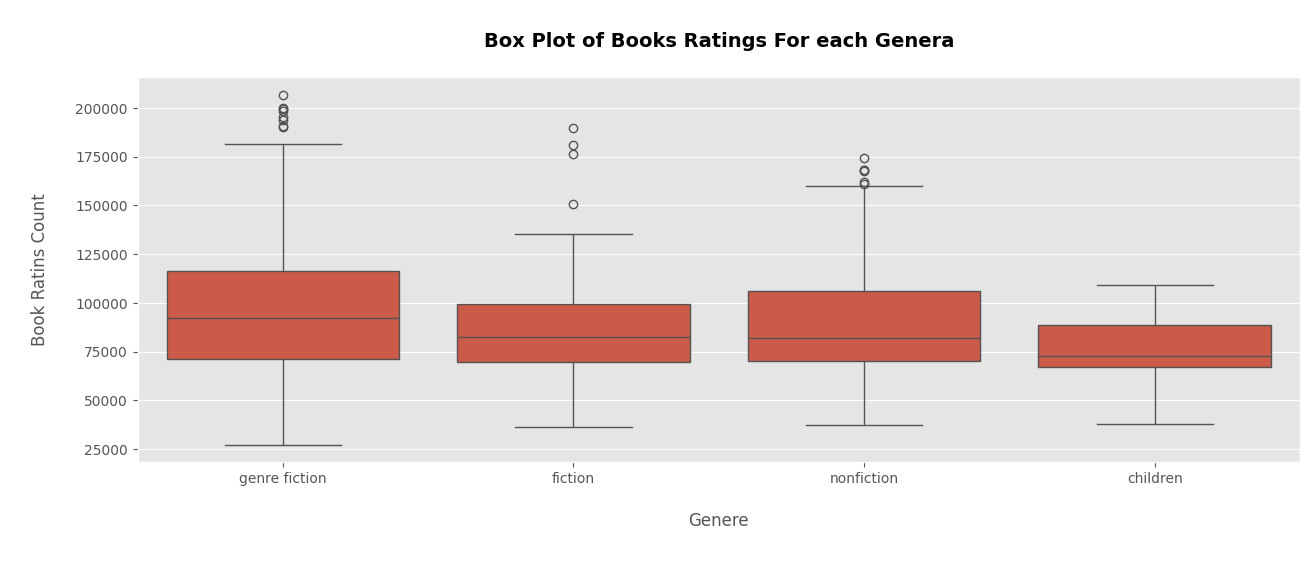

In [17]:
plt.figure(figsize = (15 , 5))
sns.boxplot( x = df['genre'] , y = df['Book_ratings_count'])
plt.title('\nBox Plot of Books Ratings For each Genera\n' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('\nGenere\n' , fontsize = 12)
plt.ylabel('\nBook Ratins Count\n' , fontsize = 12)
plt.show()

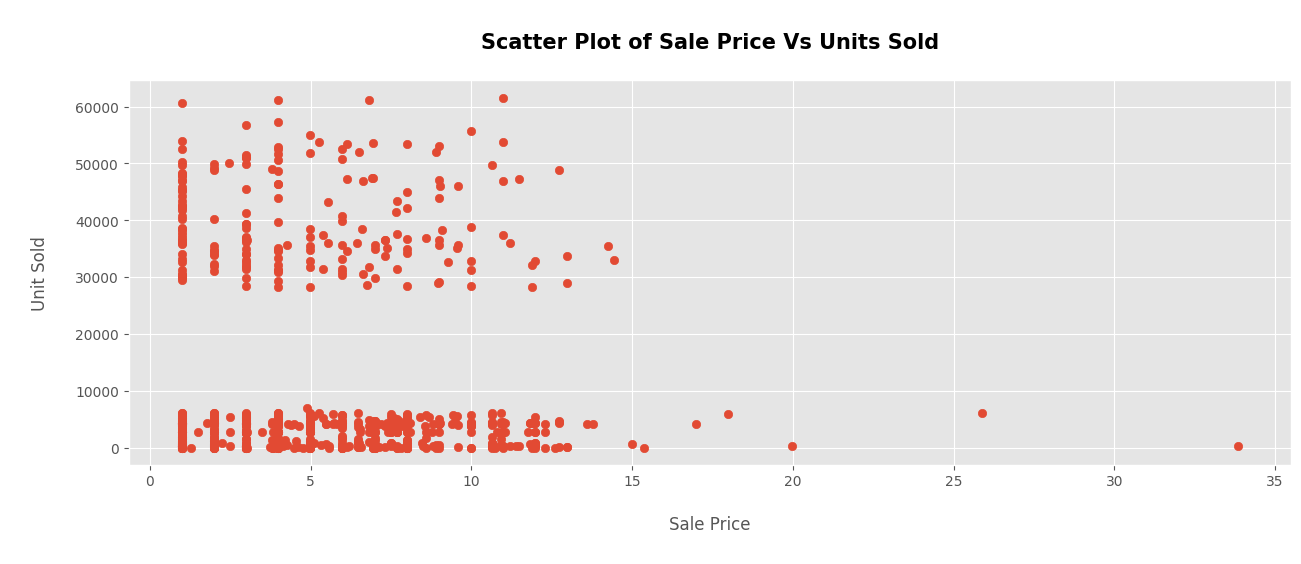

In [19]:
plt.figure(figsize = (15 , 5))
plt.scatter(df['sale price'] , df['units sold'])
plt.title('\nScatter Plot of Sale Price Vs Units Sold\n' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('\nSale Price\n' , fontsize = 12)
plt.ylabel('\nUnit Sold\n' , fontsize = 12)
plt.show()

In [24]:
Language_counts = df['language_code'].value_counts().head(3)

In [23]:
Language_counts

,count
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
spa,2
ara,2
nl,1


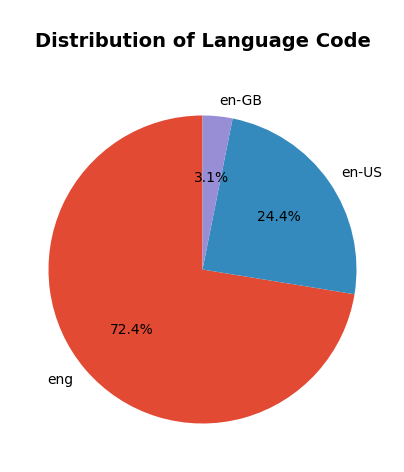

In [27]:
plt.figure(figsize = (14 , 5))
plt.pie(Language_counts , labels = Language_counts.index , startangle= 90 , autopct = '%1.1f%%')
plt.title('\nDistribution of Language Code\n' , fontsize = 14 , fontweight = 'bold')
plt.show()

In [42]:
Publisher_Revenues = df.groupby('Publisher ' )['publisher revenue'].sum().head().reset_index()

In [43]:
Publisher_Revenues

,Publisher,publisher revenue
0,"Amazon Digital Services, Inc.",141767.772
1,Hachette Book Group,107410.968
2,HarperCollins Christian Publishing,2135.670
3,HarperCollins Publishers,121769.814
4,HarperCollins Publishing,2830.806


In [45]:
px.bar(data_frame = Publisher_Revenues , x = 'Publisher ' , y = 'publisher revenue' , text_auto = True , title = '\nPublisher Revenues\n')

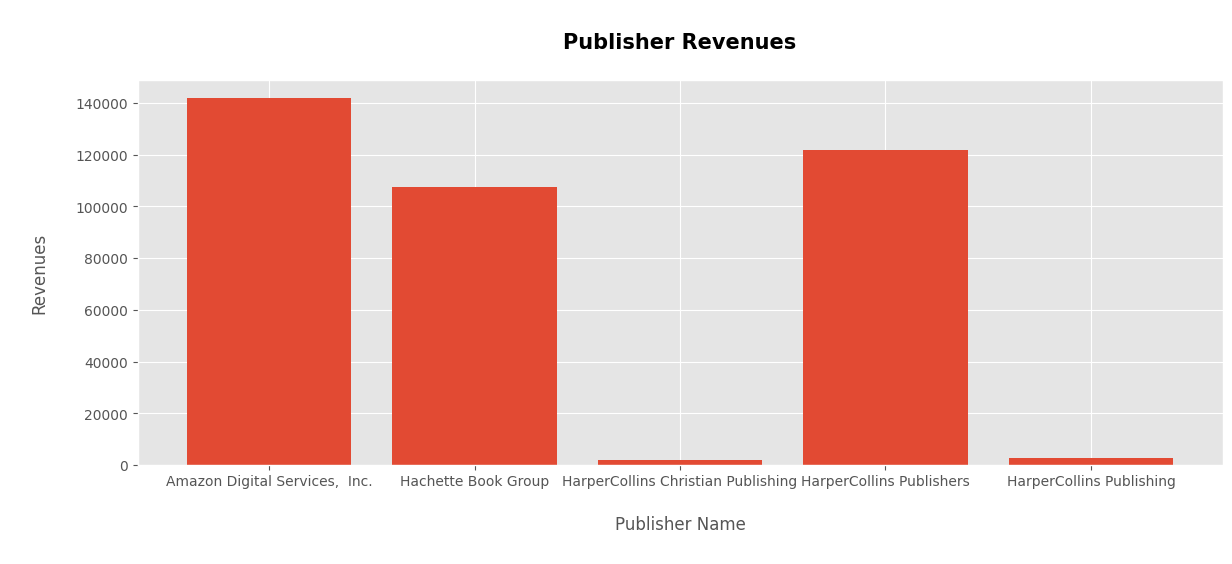

In [47]:
plt.figure(figsize = (14 , 5))
plt.bar(Publisher_Revenues['Publisher '] , Publisher_Revenues['publisher revenue'])
plt.title('\nPublisher Revenues\n' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('\nPublisher Name\n' , fontsize = 12)
plt.ylabel('\nRevenues\n' , fontsize = 12)
plt.show()

In [51]:
df.groupby('Author_Rating' , as_index= False)['Book_ratings_count'].mean().sort_values(by = 'Book_ratings_count' , ascending = False).max()

,0
Author_Rating,Novice
Book_ratings_count,101400.272569


In [54]:
df.groupby('language_code').size().sort_values(ascending = False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [57]:
df['language_code'].value_counts()

,count
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
spa,2
ara,2
nl,1


In [60]:
df.groupby('Author_Rating')['Book_ratings_count'].max()

,Book_ratings_count
Author_Rating,
Excellent,167848
Famous,206792
Intermediate,199872
Novice,155903


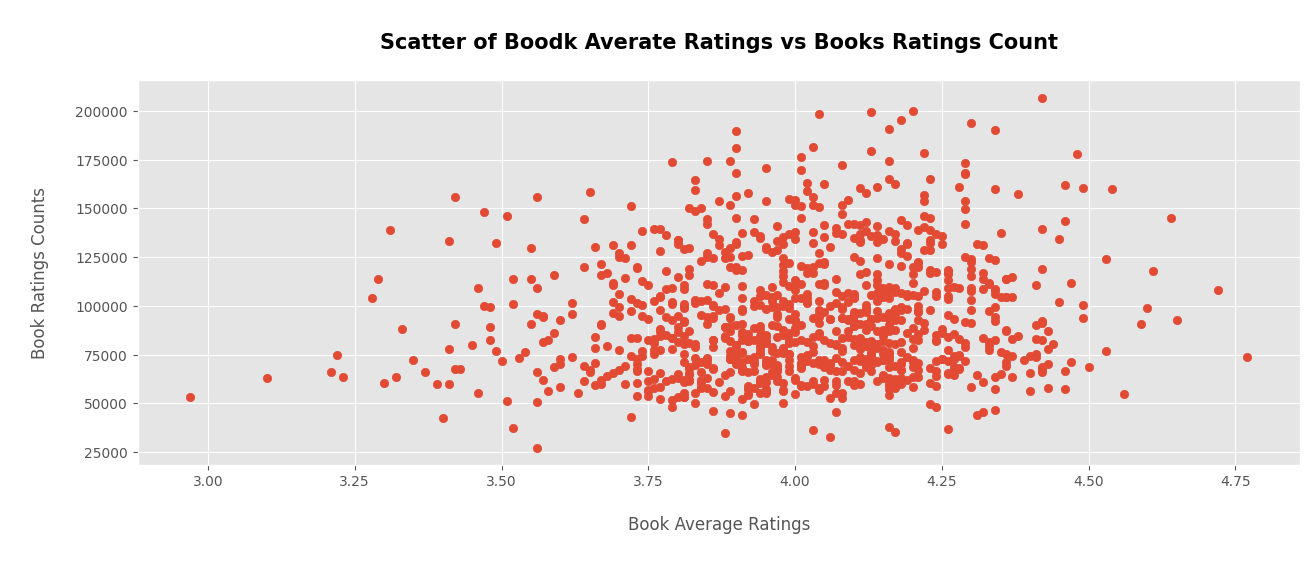

In [62]:
plt.figure(figsize = (15 , 5))
plt.scatter(df['Book_average_rating'] , df['Book_ratings_count'])
plt.title('\nScatter of Boodk Averate Ratings vs Books Ratings Count\n' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('\nBook Average Ratings\n' , fontsize = 12)
plt.ylabel('\nBook Ratings Counts\n' , fontsize = 12)
plt.show()

In [68]:
Gross_Sales_by_Author = df.groupby('Author')['gross sales'].sum().sort_values(ascending = False).head(6)

In [69]:
Gross_Sales_by_Author

,gross sales
Author,
Harper Lee,47795.00
Stephen King,43322.65
David Sedaris,42323.41
Charlaine Harris,39453.08
Laini Taylor,38278.41
"Unknown, Seamus Heaney",34160.00


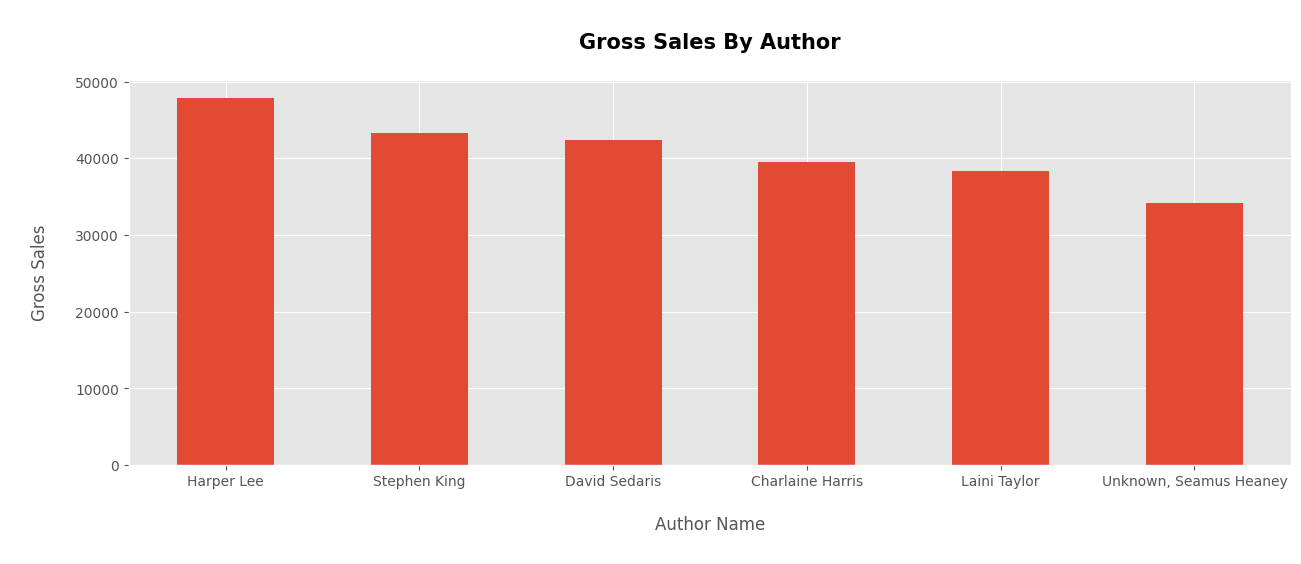

In [71]:
plt.figure(figsize = (15 , 5))
Gross_Sales_by_Author.plot(kind = 'bar')
plt.title('\nGross Sales By Author\n' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('\nAuthor Name\n' , fontsize = 12)
plt.ylabel('\nGross Sales\n' , fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

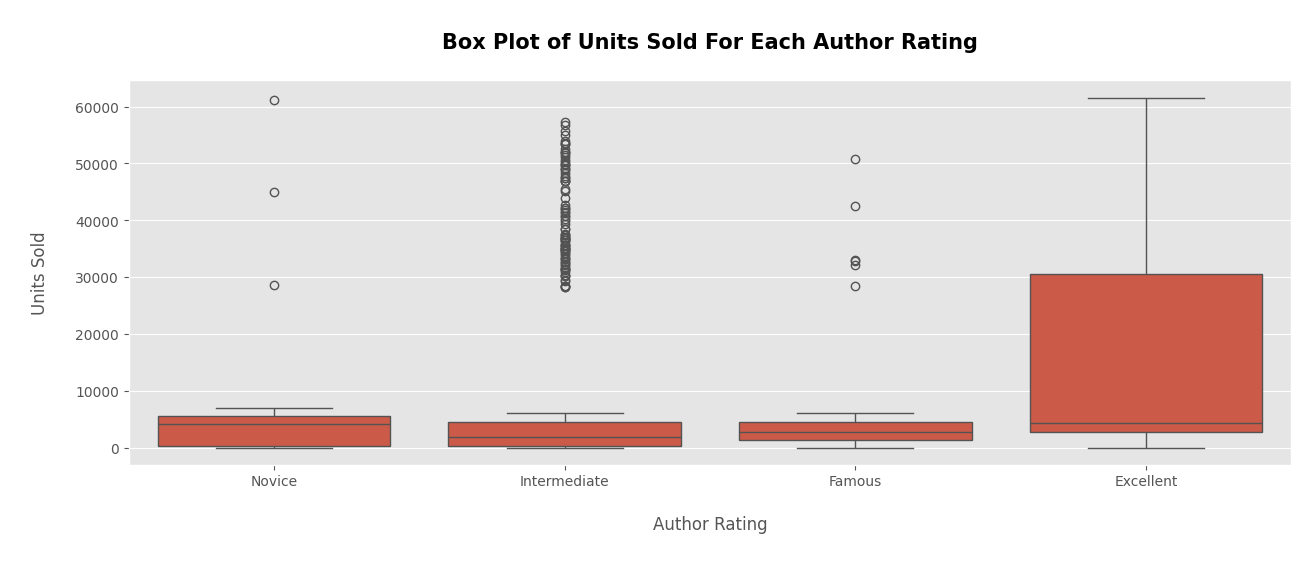

In [73]:
plt.figure(figsize = (15 , 5))
sns.boxplot(x = df['Author_Rating']  , y = df['units sold'])
plt.title('\nBox Plot of Units Sold For Each Author Rating\n' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('\nAuthor Rating\n' , fontsize = 12)
plt.ylabel('\nUnits Sold\n' , fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [77]:
Annual_Sales = df.groupby('Publishing Year')['units sold'].sum().head(7)

In [78]:
Annual_Sales

,units sold
Publishing Year,
1901.0,1415
1902.0,1535
1905.0,12630
1906.0,5718
1908.0,5706
1909.0,38253
1911.0,107


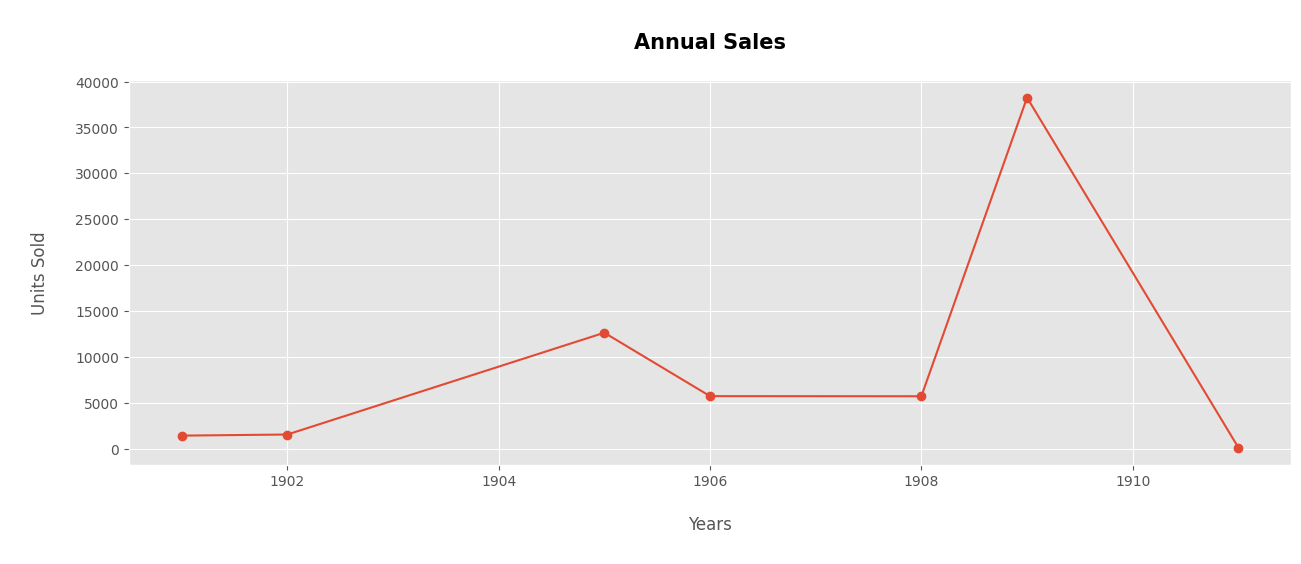

In [79]:
plt.figure(figsize = (15 , 5))
Annual_Sales.plot(kind = 'line' , marker = 'o')
plt.title('\nAnnual Sales\n' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('\nYears\n' , fontsize = 12)
plt.ylabel('\nUnits Sold\n' , fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [80]:
Year_Sales = df.groupby('Publishing Year')['units sold'].sum().head(7).reset_index()

In [81]:
Year_Sales

,Publishing Year,units sold
0,1901.0,1415
1,1902.0,1535
2,1905.0,12630
3,1906.0,5718
4,1908.0,5706
5,1909.0,38253
6,1911.0,107


In [82]:
px.line(data_frame= Year_Sales , x = 'Publishing Year' , y = 'units sold' , text = 'units sold' , title = '\nAnnual Sales\n')